# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

# Stefano Bigoni - 961886
## Exercise 01.1
The pseudo-random generator is tested by making it generate $10^6$ numbers and estimating some of their statistical properties.

### Estimation of the mean value and its error:


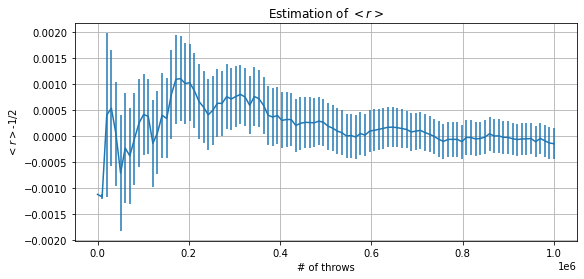

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

filename = 'output.dat'
output = open(filename,"r")
M = int(output.readline())
output.close()

data = np.loadtxt(filename,skiprows=1)

r = data[:,0]
err = data[:,1]

N = np.size(r)

x = np.linspace(1,M,N)

plt.figure(figsize=[9,4])
plt.errorbar(x,r-0.5,yerr=err)
plt.title("Estimation of $<r>$")
plt.xlabel("# of throws")
plt.ylabel("$<r>$-1/2")
plt.grid(True)
plt.show()

The plot above shows that the mean value of the pseudo-randomly generated numbers is compatible with $1/2$, as expected for a uniform distribution in $[0,1]$. There is no clear asymptotic behaviour; however, the calculated values oscillate within 1$\sigma$ of the expected one.

The $10^6$ throws were divided into 100 blocks, therefore using $10^4$ throws per block.

### Estimation of the variance and its error:

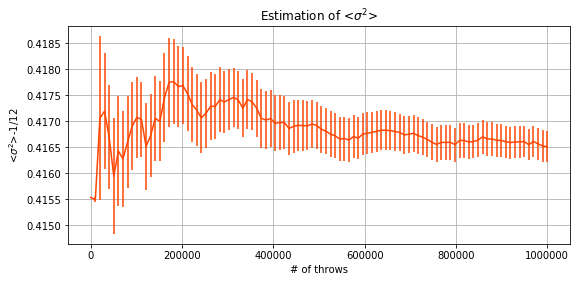

In [2]:
data = np.loadtxt("output2.dat",skiprows=1)

sigma2 = data[:,0]
err_sigma2 = data[:,1]

N = np.size(r)

plt.figure(figsize=[9,4])
plt.errorbar(x,sigma2-1/12,yerr=err_sigma2,color='orangered')
plt.title("Estimation of <$\sigma^2$>")
plt.xlabel("# of throws")
plt.ylabel("<$\sigma^2$>-1/12")
plt.grid(True)
plt.show()

The estimation of the variance reaches a stable behaviour after about $3\cdot 10^5$ throws, oscillating with an amplitude smaller than the error, therefore compatible with the expected value of $1/12$.

### 3. Chi-square test

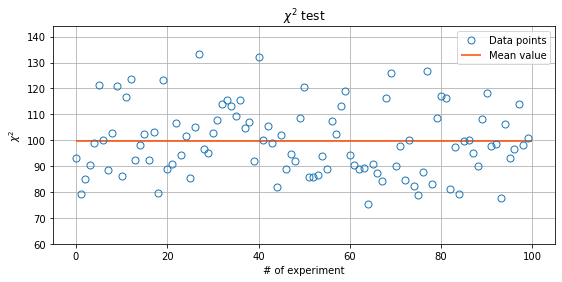

In [31]:
chi2 = np.loadtxt("chi2.dat")
plt.figure(figsize=[9,4])
plt.plot(chi2,'o',markerfacecolor='none',markersize=7)
plt.hlines(np.mean(chi2),0,np.size(chi2),'orangered')
plt.grid(True)
plt.ylim([60, 144])

plt.title('$\chi^2$ test')
plt.xlabel('# of experiment')
plt.ylabel('$\chi^2$')
plt.legend(['Data points','Mean value'])
plt.show()

The pseudo-random numbers were divided in $100$ subsets of $10^4$ numbers each, treated as different experiments, then for each experiment the $\chi^2$ for a uniform distribution was estimated dividing the interval $[0,1]$ in 100 bins.

The results are indicating a very small probability for the numbers not being drawn from a uniform distribution: the mean value extracted from all the experiments is remarkably close to 100 (expected for a uniform distribution) and the semi-dispersion is less than half of the mean value. 

## Exercise 01.2
The central limit theorem is tested for the uniform pseudo-random generator studied above and for two diffrently-distributed sets of pseudo-random numbers obtained from the same uniform generator by the method of inversion of the cumulative distribution function. The second set follows an exponential distribution and the third a Cauchy-Lorentz distribution.

By summing successive experiments, the first two are expected to converge to a Gaussian distribution, the third to itself (Cauchy-Lorentz).

In [43]:
mu = np.loadtxt(fname = "dice_unif.dat")
me = np.loadtxt(fname = "dice_exp.dat")
ml = np.loadtxt(fname = "dice_lor.dat")

no = ['1','2','10','100']

def Gauss(x,mu,sigma):
    return (2*m.pi*sigma**2)**(-0.5)*np.exp(-(x-mu)**2/(2*sigma**2))

#### Uniform distribution:

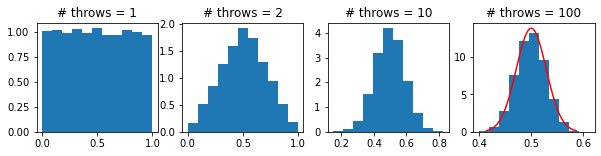

In [44]:
fig1 = plt.figure(figsize=(10,2))
for i in np.arange(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(mu[:,i],density=True,bins=11)
    plt.title('# throws = '+no[i])
sigma = np.std(mu[:,0])/10
x = np.linspace(0.5-3*sigma,0.5+3*sigma,100)
plt.plot(x,Gauss(x,0.5,sigma),'r')
plt.show()

#### Exponential distribution:

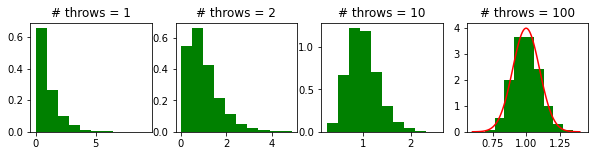

In [27]:
fig2 = plt.figure(figsize=(10,2))
for i in np.arange(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(me[:,i],color='green',bins=10, density=True)
    plt.title('# throws = '+no[i])
x = np.linspace(0.6,1.4,100)
plt.plot(x,Gauss(x,1,0.1),'r')
plt.show()

#### Cauchy-Lorentz distribution:

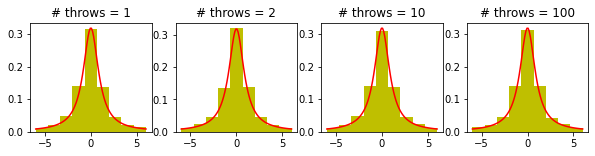

In [26]:
fig3 = plt.figure(figsize=(10,2))
x = np.linspace(-6,6,100)
for i in np.arange(0,4):
    plt.subplot(1,4,i+1)
    plt.hist(ml[:,i],range=[-6,6],bins=9,color='y',  density=True)
    plt.plot(x,1/m.pi*1/(1+x*x),'r')  
    plt.title('# throws = '+no[i]) 
plt.show()

The results are in accordance to the central limit theorem in all three cases: the first two (blue and green) are reasonably fitted by a gaussian when $100$ dice are thrown, while the third case is reasonably fitted by the same Cauchy-Lorentz curve for each of the experiments.

## Exercise 01.3

### Estimation of $\pi$ via Buffon's experiment

In order to simulate the experiment without using the value of $\pi$, I chose to use the method of inversion of the cumulative distribution function to obtain a random value $x = \cos\theta$ in $[-1,1]$ distributed in order to yield a uniformly distributed angle $\theta$ on the circumference, starting from the variable $y$ uniformly generated in $[0,1]$.

As I could not find a suitable function for the p.d.f. $f(x)$ resulting in an invertible cumulative dist. function $y = F(x)$ that matched all the needs, I decided to randomly choose at each step between the uniform distribution and one characterized by the following functions:

- p.d.f.  $f(x) = \dfrac{x}{\sqrt{1-x^2}}$ : opposite of the derivative of a quarter of circumference of radius 1 centered in the origin 
- c.d.f.  $F(x) = \int_{0}^x f(x) dx = 1-\sqrt{1-x^2}$

    According to the inversion method then $y=F(x)$ and so $x = \pm\sqrt{2y-y^2}$.

The optimal ratio between the two distributions was manually found to be 52% uniform and 48% 'circular', as visible in the Random::Circ() method:

    double Random::Circ(){
        double y = Rannyu();
        if (Rannyu()>0.48) return 2*y-1;
        else return Coin()*sqrt(2*y-y*y); 
            //the sign is random too, 
            //so to pick square-roots of both signs
    }



Assuming to throw the needles on a set of horizontal lines, considering the translational invariance along the horizontal axis and the periodicity on the vertical one, I chose to consider only two horizontal lines at distance 1 and chose the needle length L=0.5. 
I then used the previously generated numbers distributed uniformly between 0 and 1 as positions of the center of the needle and assigned each throw a value of $x = \cos\theta$, where $\theta$ is chosen as the angle with respect to the positive vertical axis.
       



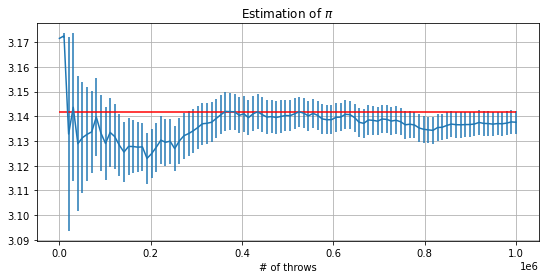

In [90]:
filename = "events.dat"

output = open(filename,"r")
M = int(output.readline())
output.close()

data = np.loadtxt(filename,skiprows=1)
L = data[-1,0] #read L from last line
data = data[0:-1,:] #truncate array

ev = data[:,0]
err_ev  = data[:,1]

#estimation of pi and its uncertainty gr
pi = 2*L/ev
err_pi = 2*L/ev**2*err_ev

plt.figure(figsize=[9,4])
x = np.linspace(0,M,100)
plt.errorbar(x,pi,yerr=err_pi)
plt.hlines(m.pi,0,1e6,'r')
plt.title("Estimation of $\pi$")
plt.xlabel("# of throws")
plt.ylabel("")
plt.grid(True)
plt.show()

The estimation is compatible with the actual value of $\pi$, although this happens only with the right choice of the ratio between the two different distributions.
Below is shown the distribution of the first $10^4$ values of $x=\cos\theta$ to give some insight on the angular distribution obtained in this simulation, which is not perfectly uniform.

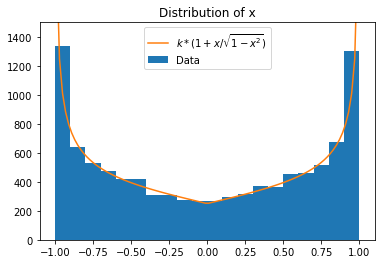

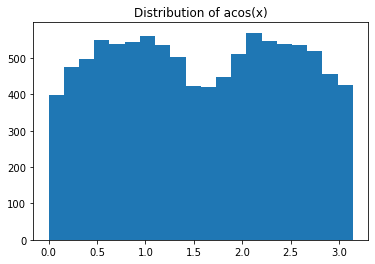

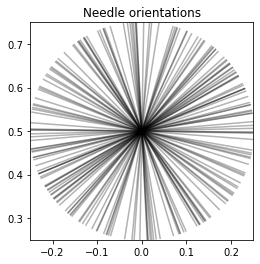

In [94]:
cos_t = np.loadtxt("cos.dat")

#plt.title("p.d.f: Uniform alternated with $x/\sqrt{1-x^2}$")
plt.title("Distribution of x")
plt.hist(cos_t,bins=20)
x = np.linspace(-0.99,0.99,100)
plt.plot(x,250*(1+abs(x)/(1-x**2)**(1/2)))
plt.ylim([0,1500])
plt.legend(["$k*(1+x/\sqrt{1-x^2})$","Data"])

plt.figure()
plt.title("Distribution of acos(x)")
plt.hist(np.arccos(cos_t), bins=20)

plt.figure(figsize = [4,4])
sin_t = np.sqrt(1-cos_t**2)
plt.title("Needle orientations")
for i in np.arange(0,100):
    x = np.array([-L/2*sin_t[i],L/2*sin_t[i]])
    y = np.array([0.5 - L/2*cos_t[i],0.5+L/2*cos_t[i]])
    plt.plot(x,y,'k',alpha=0.3)
    #plt.scatter(0,r[i])
    plt.ylim([0.5-L/2,0.5+L/2])
    plt.xlim([-L/2,L/2])

plt.show()